<h1 style="text-align:center; color:darkblue;">Capstone Project – 1</h1>
<h2 style="text-align:center; color:darkgreen;">Data Pre-Processing, Feature Engineering & EDA</h2>
<h3 style="text-align:center; color:darkred;">Healthcare Cancer Dataset</h3>


<h2 style="color:purple;">Introduction</h2>

<p>
This capstone project focuses on cleaning, preprocessing, and analyzing a global healthcare
cancer dataset collected from multiple countries. The goal is to prepare the data for
analysis, perform exploratory data analysis (EDA), and extract meaningful insights related
to cancer severity, survival years, and treatment cost.
</p>


<h2 style="color:darkgreen;">IMPORT REQUIRED LIBRARIES</h2>


In [188]:
# Numerical computation
import numpy as np

# Data manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns




<h2 style="color:purple; text-align:center;">TASK 1</h2>
<h3 style="color:teal; text-align:center;">READ THE DATASET</h3>


In [189]:
# Reading the healthcare cancer dataset using pandas
df = pd.read_csv(r"C:\Users\sekhar\OneDrive\Desktop\AI-FROM-SCRATCH\capstone-project\global_cancer_patients_2015_2024.csv")



<p style="color:darkgreen;">
The dataset is successfully loaded into a pandas DataFrame using pd.read_csv(),
making it ready for data inspection and analysis.
</p>


In [190]:
# Displaying all column names (features) present in the dataset

df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

<p style="color:blue;">
The <b>df.columns</b> attribute is used to display all column names present in the dataset.
It helps in understanding the available features and identifying which variables can be
used for data cleaning, feature engineering, and analysis.
</p>


In [191]:
len(df.columns)

15

<p style="color:purple;">
len(df.columns) shows the total number of features in the dataset.
</p>


In [192]:
# Displaying first 5 rows of the dataset
df.head()


,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71.0,Male,UK,2021.0,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34.0,Male,China,2021.0,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80.0,Male,Pakistan,2023.0,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40.0,Male,UK,2015.0,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43.0,Female,Brazil,2017.0,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


<h2 style="text-align:center; color:purple;">TASK 2</h2>
<h3 style="text-align:center; color:teal;">DATA UNDERSTANDING & INSPECTION</h3>
<hr>


In [193]:
df.shape

(50000, 15)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    49993 non-null  float64
 2   Gender                 49993 non-null  object 
 3   Country_Region         49996 non-null  object 
 4   Year                   49992 non-null  float64
 5   Genetic_Risk           49993 non-null  float64
 6   Air_Pollution          49991 non-null  float64
 7   Alcohol_Use            49992 non-null  float64
 8   Smoking                49990 non-null  float64
 9   Obesity_Level          49994 non-null  float64
 10  Cancer_Type            49993 non-null  object 
 11  Cancer_Stage           49987 non-null  object 
 12  Treatment_Cost_USD     49994 non-null  float64
 13  Survival_Years         49996 non-null  float64
 14  Target_Severity_Score  49996 non-null  float64
dtypes:

<p style="color:steelblue;">
The <b>df.info()</b> method provides a concise summary of the dataset, including column
names, data types, and the number of non-null values. This helps identify missing values,
incorrect data types, and distinguishes between numerical and categorical features.
</p>


In [195]:
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,49993.000000,49992.000000,49993.000000,49991.000000,49992.000000,49990.000000,49994.000000,49994.000000,49996.000000,49996.000000
mean,54.420839,2019.480777,5.001696,5.009876,5.010816,4.989836,4.990985,52467.106608,5.006499,4.951233
std,20.224295,2.871424,2.885751,2.888493,2.888737,2.881588,2.894543,27363.570020,2.883299,1.199716
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.545000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76231.465000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


<p style="color:black;">
The <b>df.describe()</b> function generates statistical summaries for numerical columns,
such as mean, minimum, maximum, and standard deviation. It is useful for understanding
data distribution and detecting potential outliers.
</p>


In [196]:
df.isnull().sum()


Patient_ID                0
Age                       7
Gender                    7
Country_Region            4
Year                      8
Genetic_Risk              7
Air_Pollution             9
Alcohol_Use               8
Smoking                  10
Obesity_Level             6
Cancer_Type               7
Cancer_Stage             13
Treatment_Cost_USD        6
Survival_Years            4
Target_Severity_Score     4
dtype: int64

<p style="color:purple;">
The <b>df.isnull().sum()</b> function returns the total number of missing values in each
column. This helps determine which features require data cleaning or imputation before
further analysis.
</p>


<font color="red">Missing values were observed in columns such as Age, Genetic_Risk, and Cancer_Stage, indicating the need for data cleaning</font>

<h2 style="text-align:center; color:purple;">TASK 3</h2>
<h3 style="text-align:center; color:teal;">DATA CLEANING</h3>
<hr>

<font color ="BLUE">some patients age was null and empty values  with using  fillna() methodd  to fill nan values in the dataset </font><br>
<font color ="red">NOTE You used the median because it’s the most fair middle number, especially if your data has some extreme ages (outliers) that would mess up the average. </font>

In [197]:

df.isnull().sum()


Patient_ID                0
Age                       7
Gender                    7
Country_Region            4
Year                      8
Genetic_Risk              7
Air_Pollution             9
Alcohol_Use               8
Smoking                  10
Obesity_Level             6
Cancer_Type               7
Cancer_Stage             13
Treatment_Cost_USD        6
Survival_Years            4
Target_Severity_Score     4
dtype: int64

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    49993 non-null  float64
 2   Gender                 49993 non-null  object 
 3   Country_Region         49996 non-null  object 
 4   Year                   49992 non-null  float64
 5   Genetic_Risk           49993 non-null  float64
 6   Air_Pollution          49991 non-null  float64
 7   Alcohol_Use            49992 non-null  float64
 8   Smoking                49990 non-null  float64
 9   Obesity_Level          49994 non-null  float64
 10  Cancer_Type            49993 non-null  object 
 11  Cancer_Stage           49987 non-null  object 
 12  Treatment_Cost_USD     49994 non-null  float64
 13  Survival_Years         49996 non-null  float64
 14  Target_Severity_Score  49996 non-null  float64
dtypes:

In [199]:
from sklearn.impute import SimpleImputer
# numerical columns
num_cols = ['Age','Year','Genetic_Risk','Air_Pollution','Alcohol_Use','Smoking','Obesity_Level','Treatment_Cost_USD','Survival_Years','Target_Severity_Score']
# create imputer
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [200]:
df.isnull().sum()

Patient_ID                0
Age                       0
Gender                    7
Country_Region            4
Year                      0
Genetic_Risk              0
Air_Pollution             0
Alcohol_Use               0
Smoking                   0
Obesity_Level             0
Cancer_Type               7
Cancer_Stage             13
Treatment_Cost_USD        0
Survival_Years            0
Target_Severity_Score     0
dtype: int64

<p style="color:steelblue;">
This code block performs <b>numerical data imputation</b> using the
<b>SimpleImputer</b> from the scikit-learn library. All selected numerical
columns are checked for missing values, and any missing entries are replaced
with the <b>mean</b> of the respective column. This ensures the dataset is
complete, maintains numerical consistency, and prepares the data for further
analysis and machine learning modeling.
</p>


In [201]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols


Index(['Patient_ID', 'Gender', 'Country_Region', 'Cancer_Type',
       'Cancer_Stage'],
      dtype='object')

In [202]:
## categorical 
from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [203]:
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

In [204]:
## duplicates 
df.duplicated().sum()


0

<p style="color:green;">
The <b>df.duplicated().sum()</b> function checks for duplicate rows in the dataset and
returns the total count of duplicated records. Identifying duplicates is important to
avoid biased analysis and ensure data quality before performing exploratory data
analysis or building machine learning models.
</p>


In [205]:
print(df.duplicated().sum())

0


In [206]:
print(df['Patient_ID'].duplicated().sum())

0


In [207]:
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71.0,Male,UK,2021.0,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34.0,Male,China,2021.0,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80.0,Male,Pakistan,2023.0,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40.0,Male,UK,2015.0,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43.0,Female,Brazil,2017.0,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


<h2 style="text-align:center; color:purple;">TASK 4</h2>
<h3 style="text-align:center; color:teal;">DEALING WITH OUTLIERS</h3>
<hr>

<br style=" color:RED;"><b>Theory:</b>
Types of Data : Data is classfied into 2 types <br>
One is <b> catergorical data</b><br>
Another one is <b> numerical  data</b><br>
<b>Quantitative Data::<b> Classfied into  discrete and continuous

<b>Rewquired Formulas to finding outliers</b><br>
<b>IQR: </b>
IQR stands for Interquartile Range<br>
<font color='green'> Required formula You know to perform Operations</font><br>
<b>IQR= Q3-Q1 </b><br>
Q1= qunatile(0.25)<br>
Q3= qunatile(0.75)<br>
lower fence(Q1-1.5 *IQR)) <br>
higher fencce= (Q3+1.5*IQR))

<Axes: xlabel='Age'>

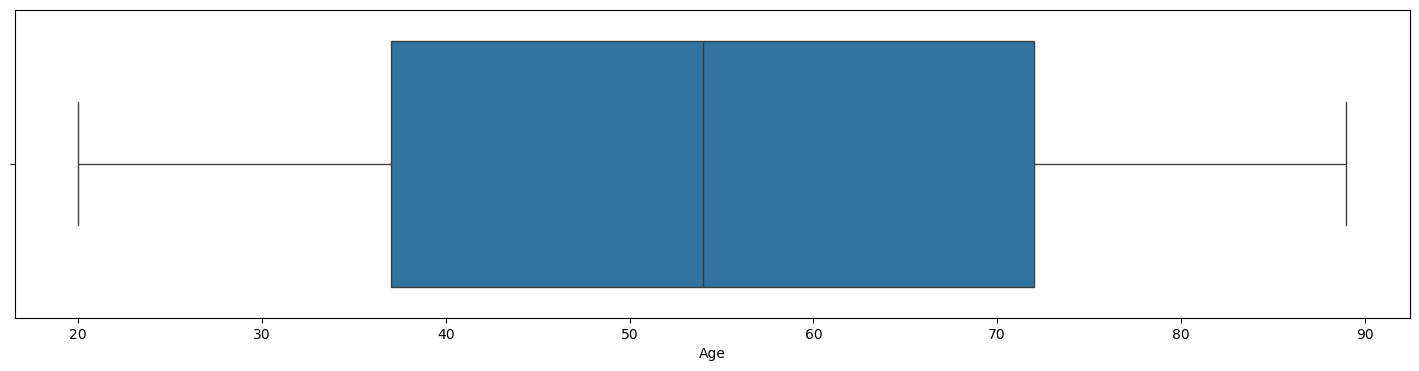

In [212]:
plt.figure(figsize=(18,4),dpi=100)
sns.boxplot(df['Age'],orient='h')

<Axes: ylabel='Age'>

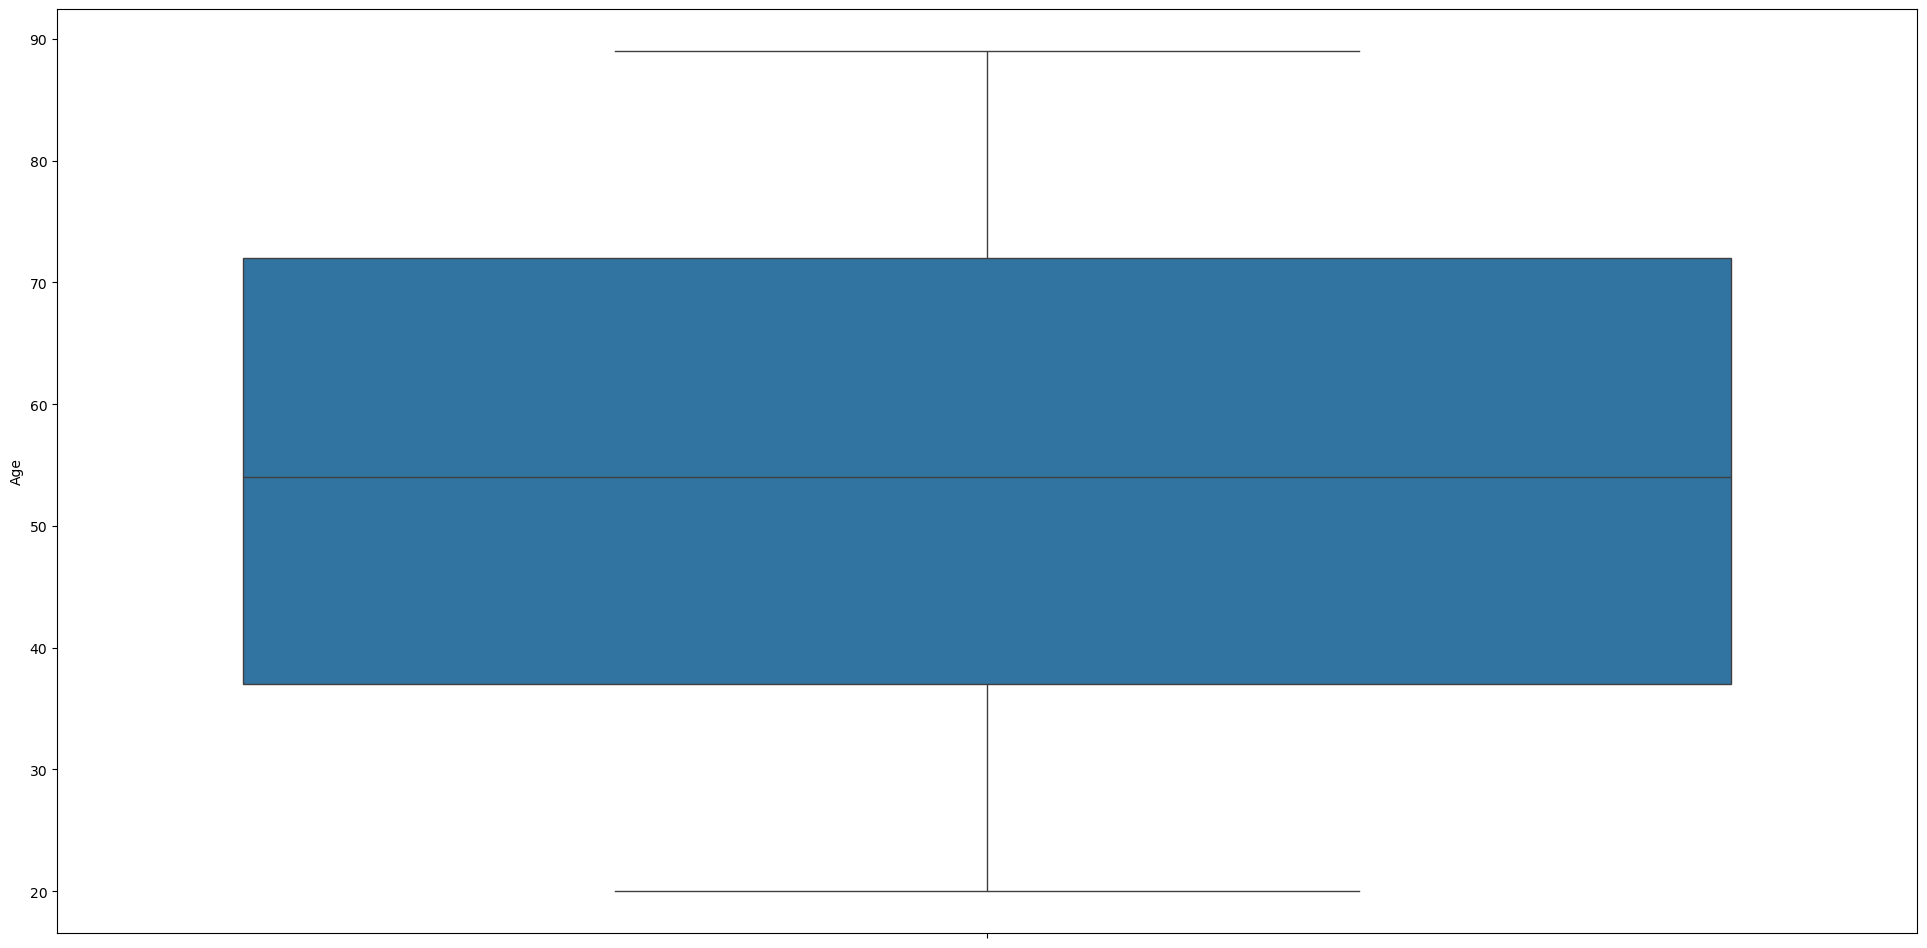

In [218]:
plt.figure(figsize=(24,12),dpi=100)
sns.boxplot(df['Age'],orient='v')

In [209]:
num_cols

['Age',
 'Year',
 'Genetic_Risk',
 'Air_Pollution',
 'Alcohol_Use',
 'Smoking',
 'Obesity_Level',
 'Treatment_Cost_USD',
 'Survival_Years',
 'Target_Severity_Score']

<Axes: >

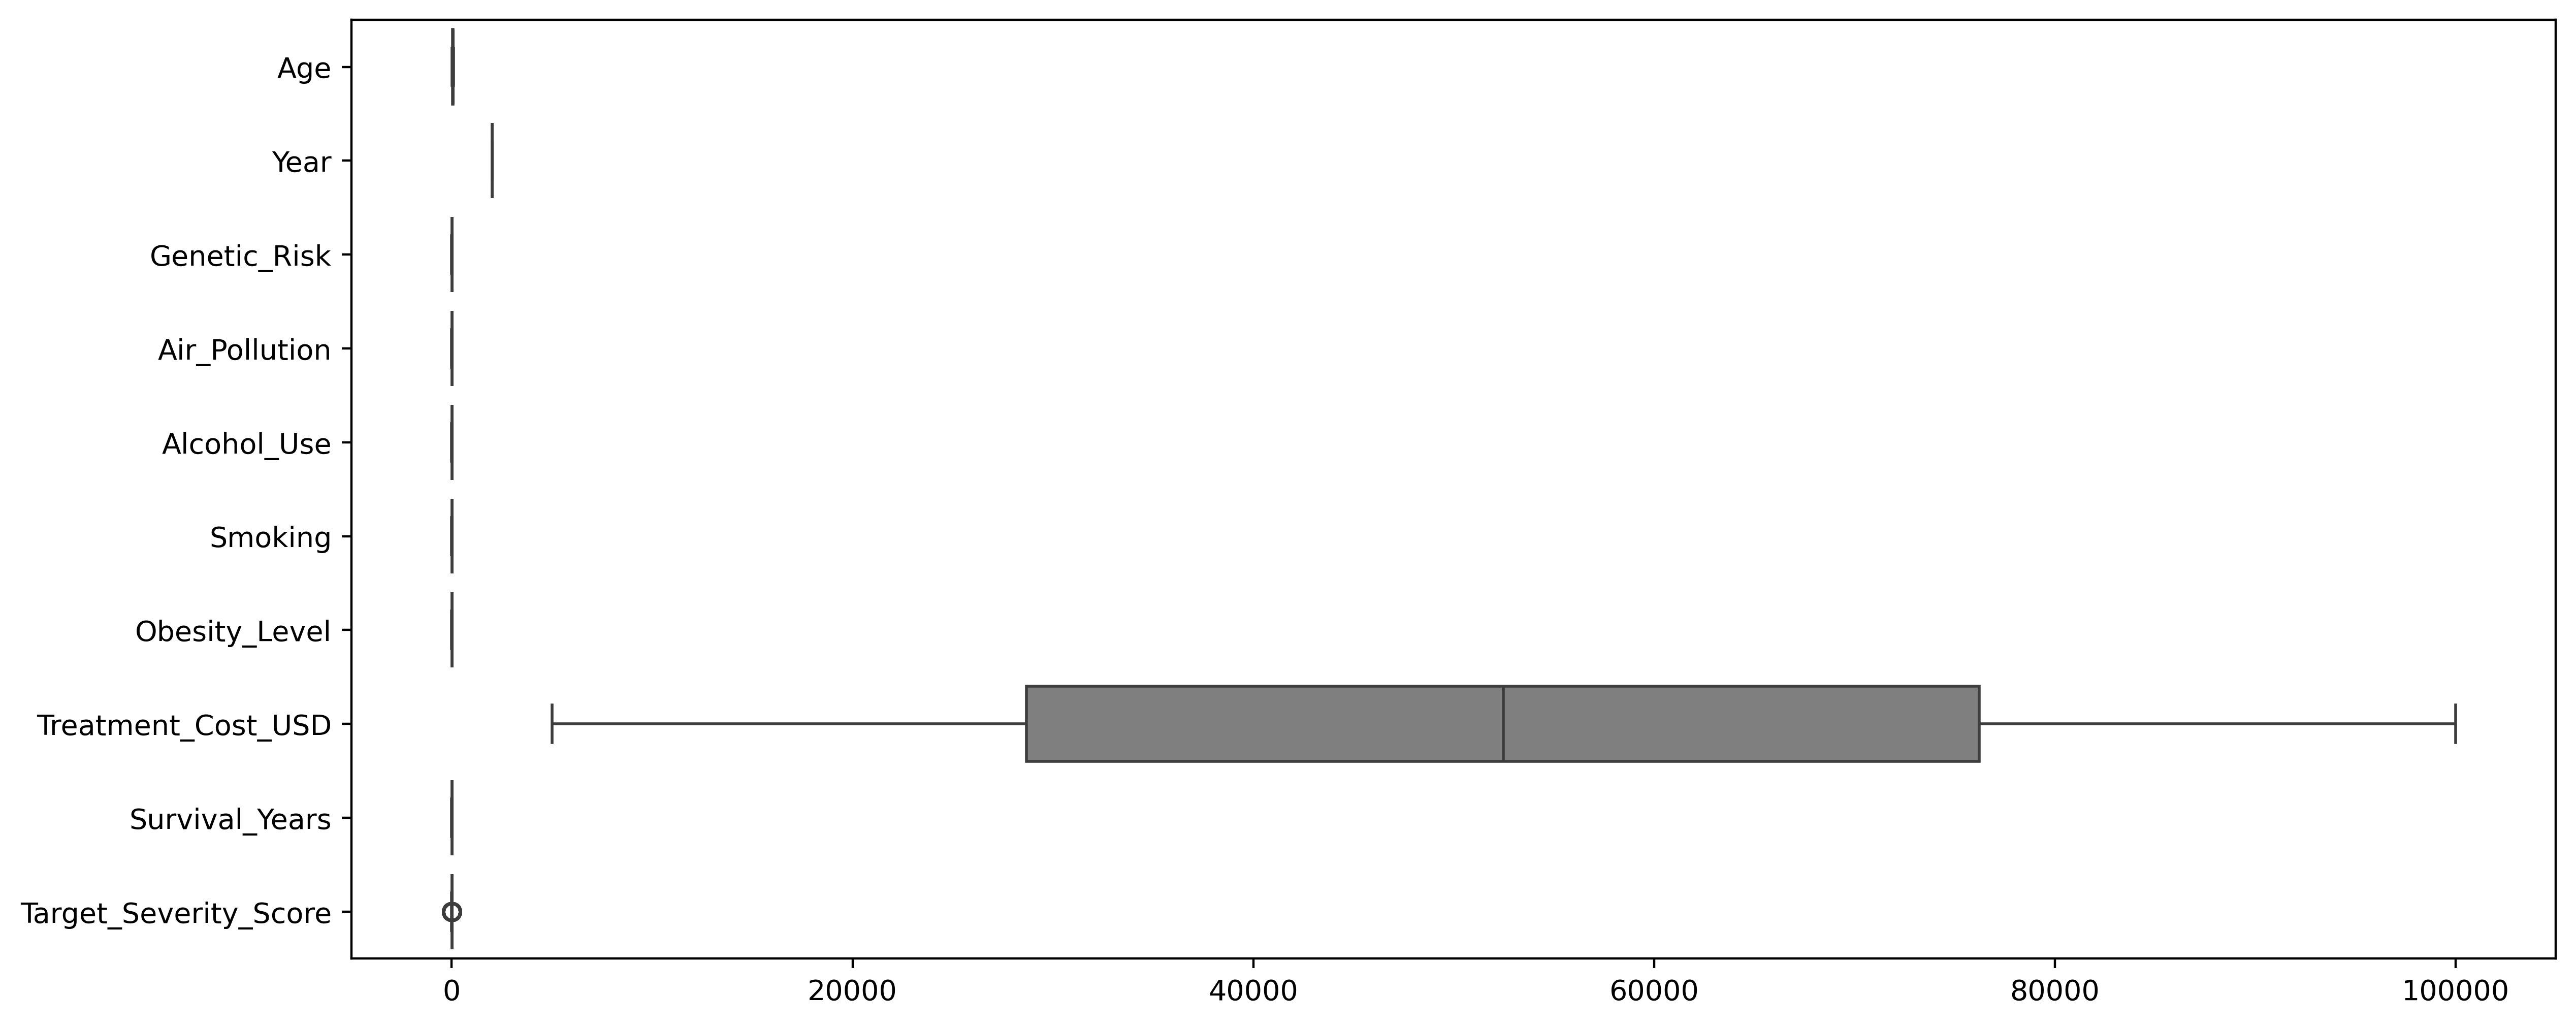

In [213]:
plt.figure(figsize=(14,6),dpi=400)
##plt.figure(figsize=(10, len(num_cols)*0.6), dpi=300)
sns.boxplot(df[num_cols],orient='h')

<Axes: >

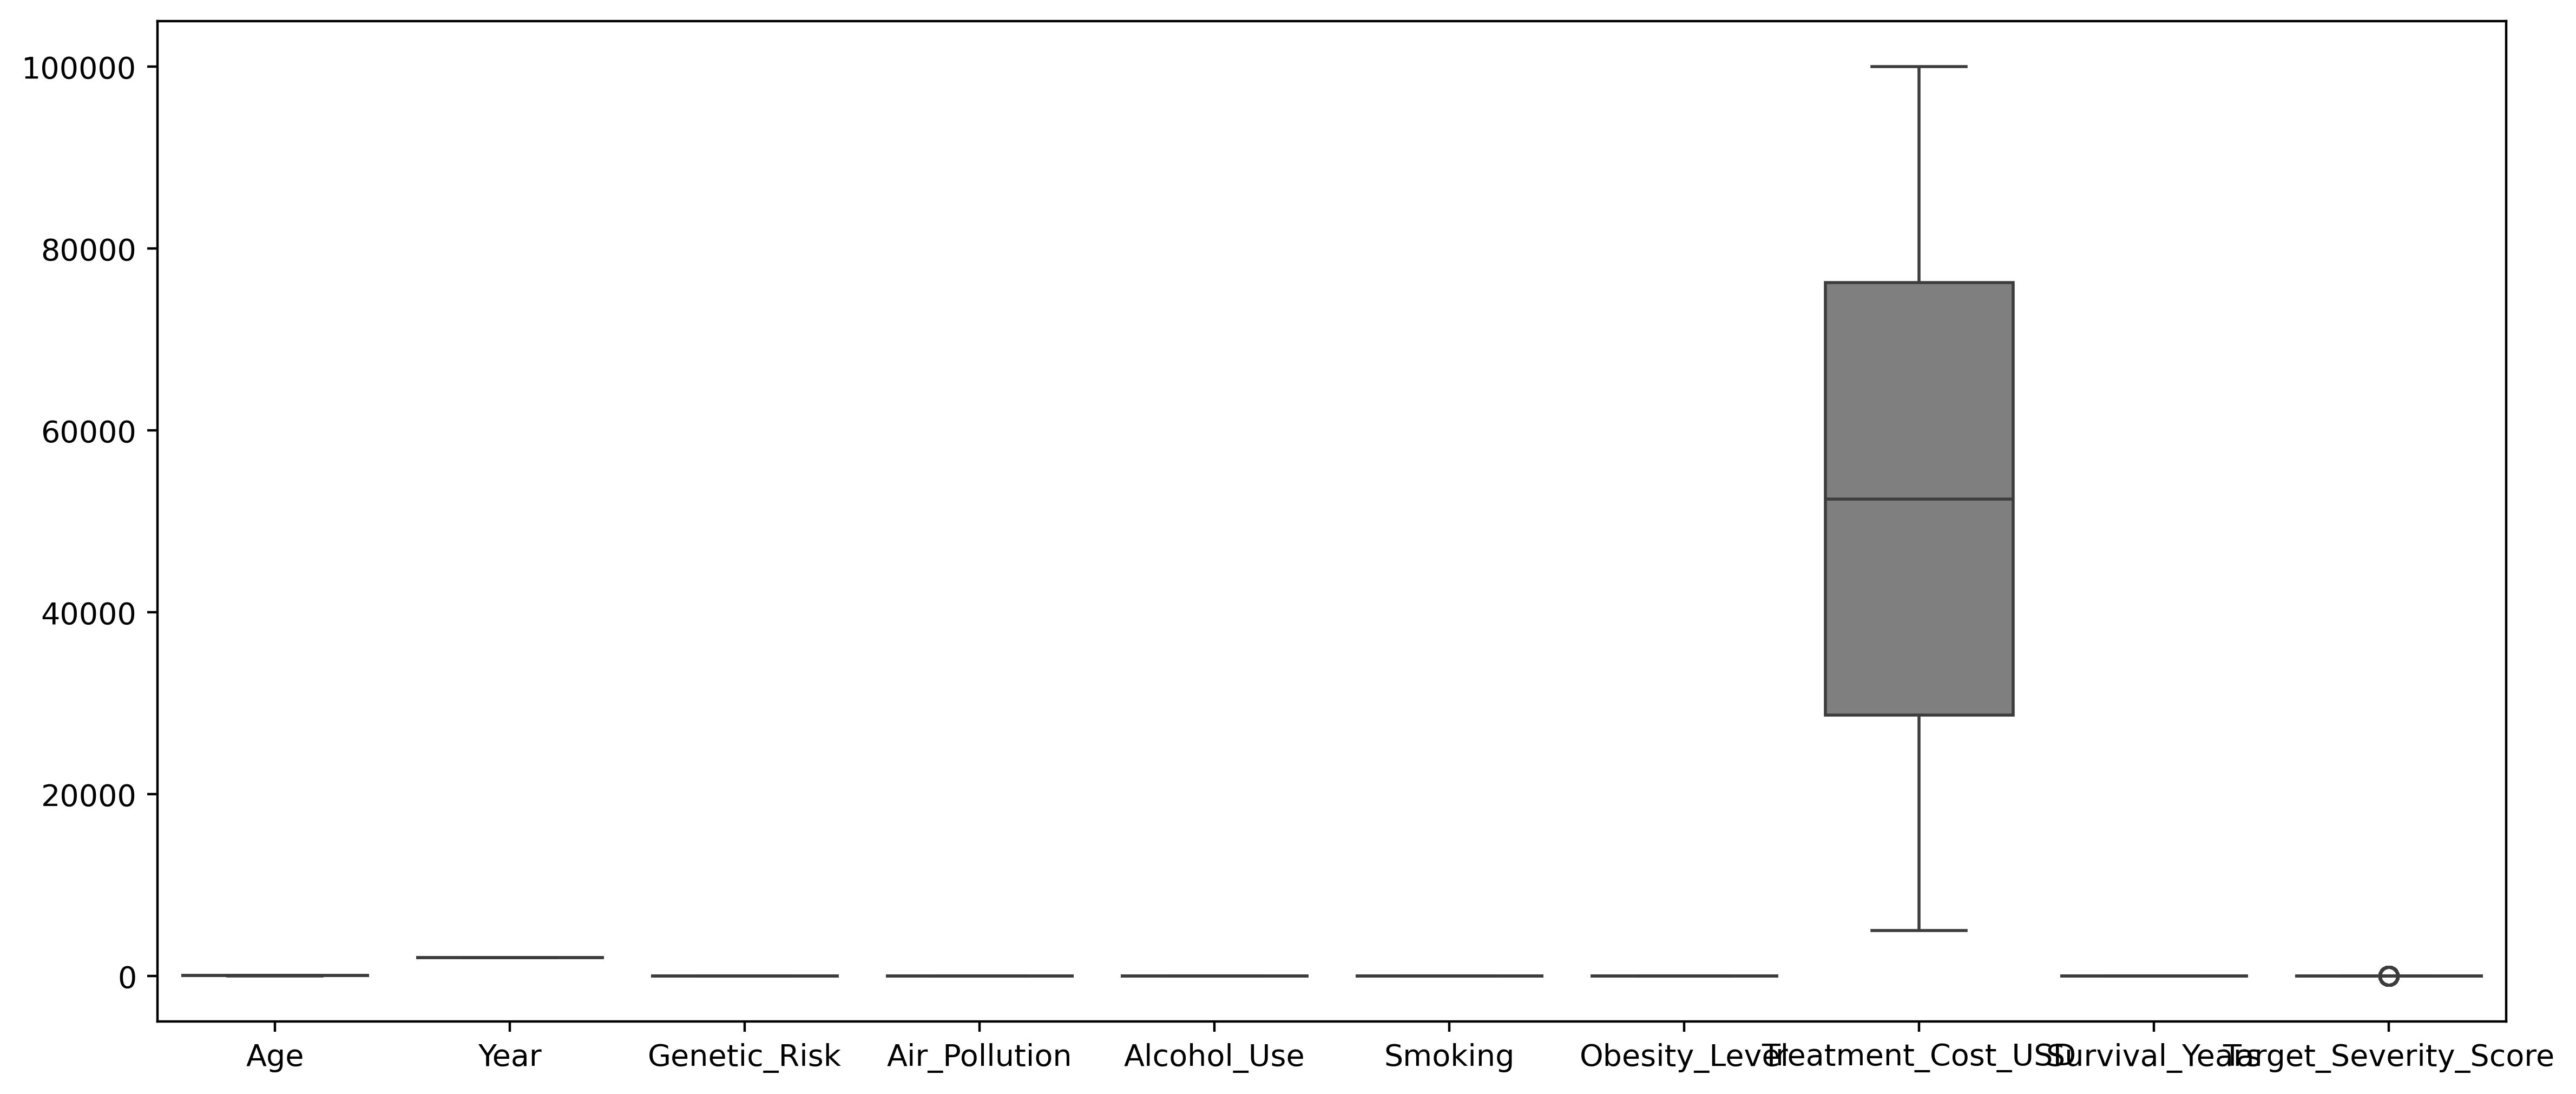

In [219]:
plt.figure(figsize=(14,6),dpi=400)
##plt.figure(figsize=(10, len(num_cols)*0.6), dpi=300)
sns.boxplot(df[num_cols],orient='v')

In [220]:
# Q1
Q1=df[num_cols].quantile(0.25)
Q1

Age                         37.0000
Year                      2017.0000
Genetic_Risk                 2.5000
Air_Pollution                2.5000
Alcohol_Use                  2.5000
Smoking                      2.5000
Obesity_Level                2.5000
Treatment_Cost_USD       28689.8975
Survival_Years               2.5000
Target_Severity_Score        4.1200
Name: 0.25, dtype: float64

In [221]:
Q3=df[num_cols].quantile(0.75)

In [222]:
Q3

Age                         72.0000
Year                      2022.0000
Genetic_Risk                 7.5000
Air_Pollution                7.5000
Alcohol_Use                  7.5000
Smoking                      7.5000
Obesity_Level                7.5000
Treatment_Cost_USD       76229.3275
Survival_Years               7.5000
Target_Severity_Score        5.7800
Name: 0.75, dtype: float64

In [223]:
## outliers
# (Q1-1.5*IQR)  LOWER WHERSER
# (Q3+1.5*IQR)  UPPER WHERSER
IQR=Q3-Q1

In [224]:
IQR

Age                         35.00
Year                         5.00
Genetic_Risk                 5.00
Air_Pollution                5.00
Alcohol_Use                  5.00
Smoking                      5.00
Obesity_Level                5.00
Treatment_Cost_USD       47539.43
Survival_Years               5.00
Target_Severity_Score        1.66
dtype: float64

In [225]:
outliers=(df[num_cols] < (Q1-1.5*IQR)) | (df[num_cols] > (Q3+1.5*IQR))

In [226]:
outliers

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False


In [227]:
outliers.sum()

Age                        0
Year                       0
Genetic_Risk               0
Air_Pollution              0
Alcohol_Use                0
Smoking                    0
Obesity_Level              0
Treatment_Cost_USD         0
Survival_Years             0
Target_Severity_Score    151
dtype: int64

In [228]:
df.shape

(50000, 15)

In [229]:

df=df[~(outliers).any(axis=1)]

In [230]:
df.shape


(49849, 15)

<Axes: >

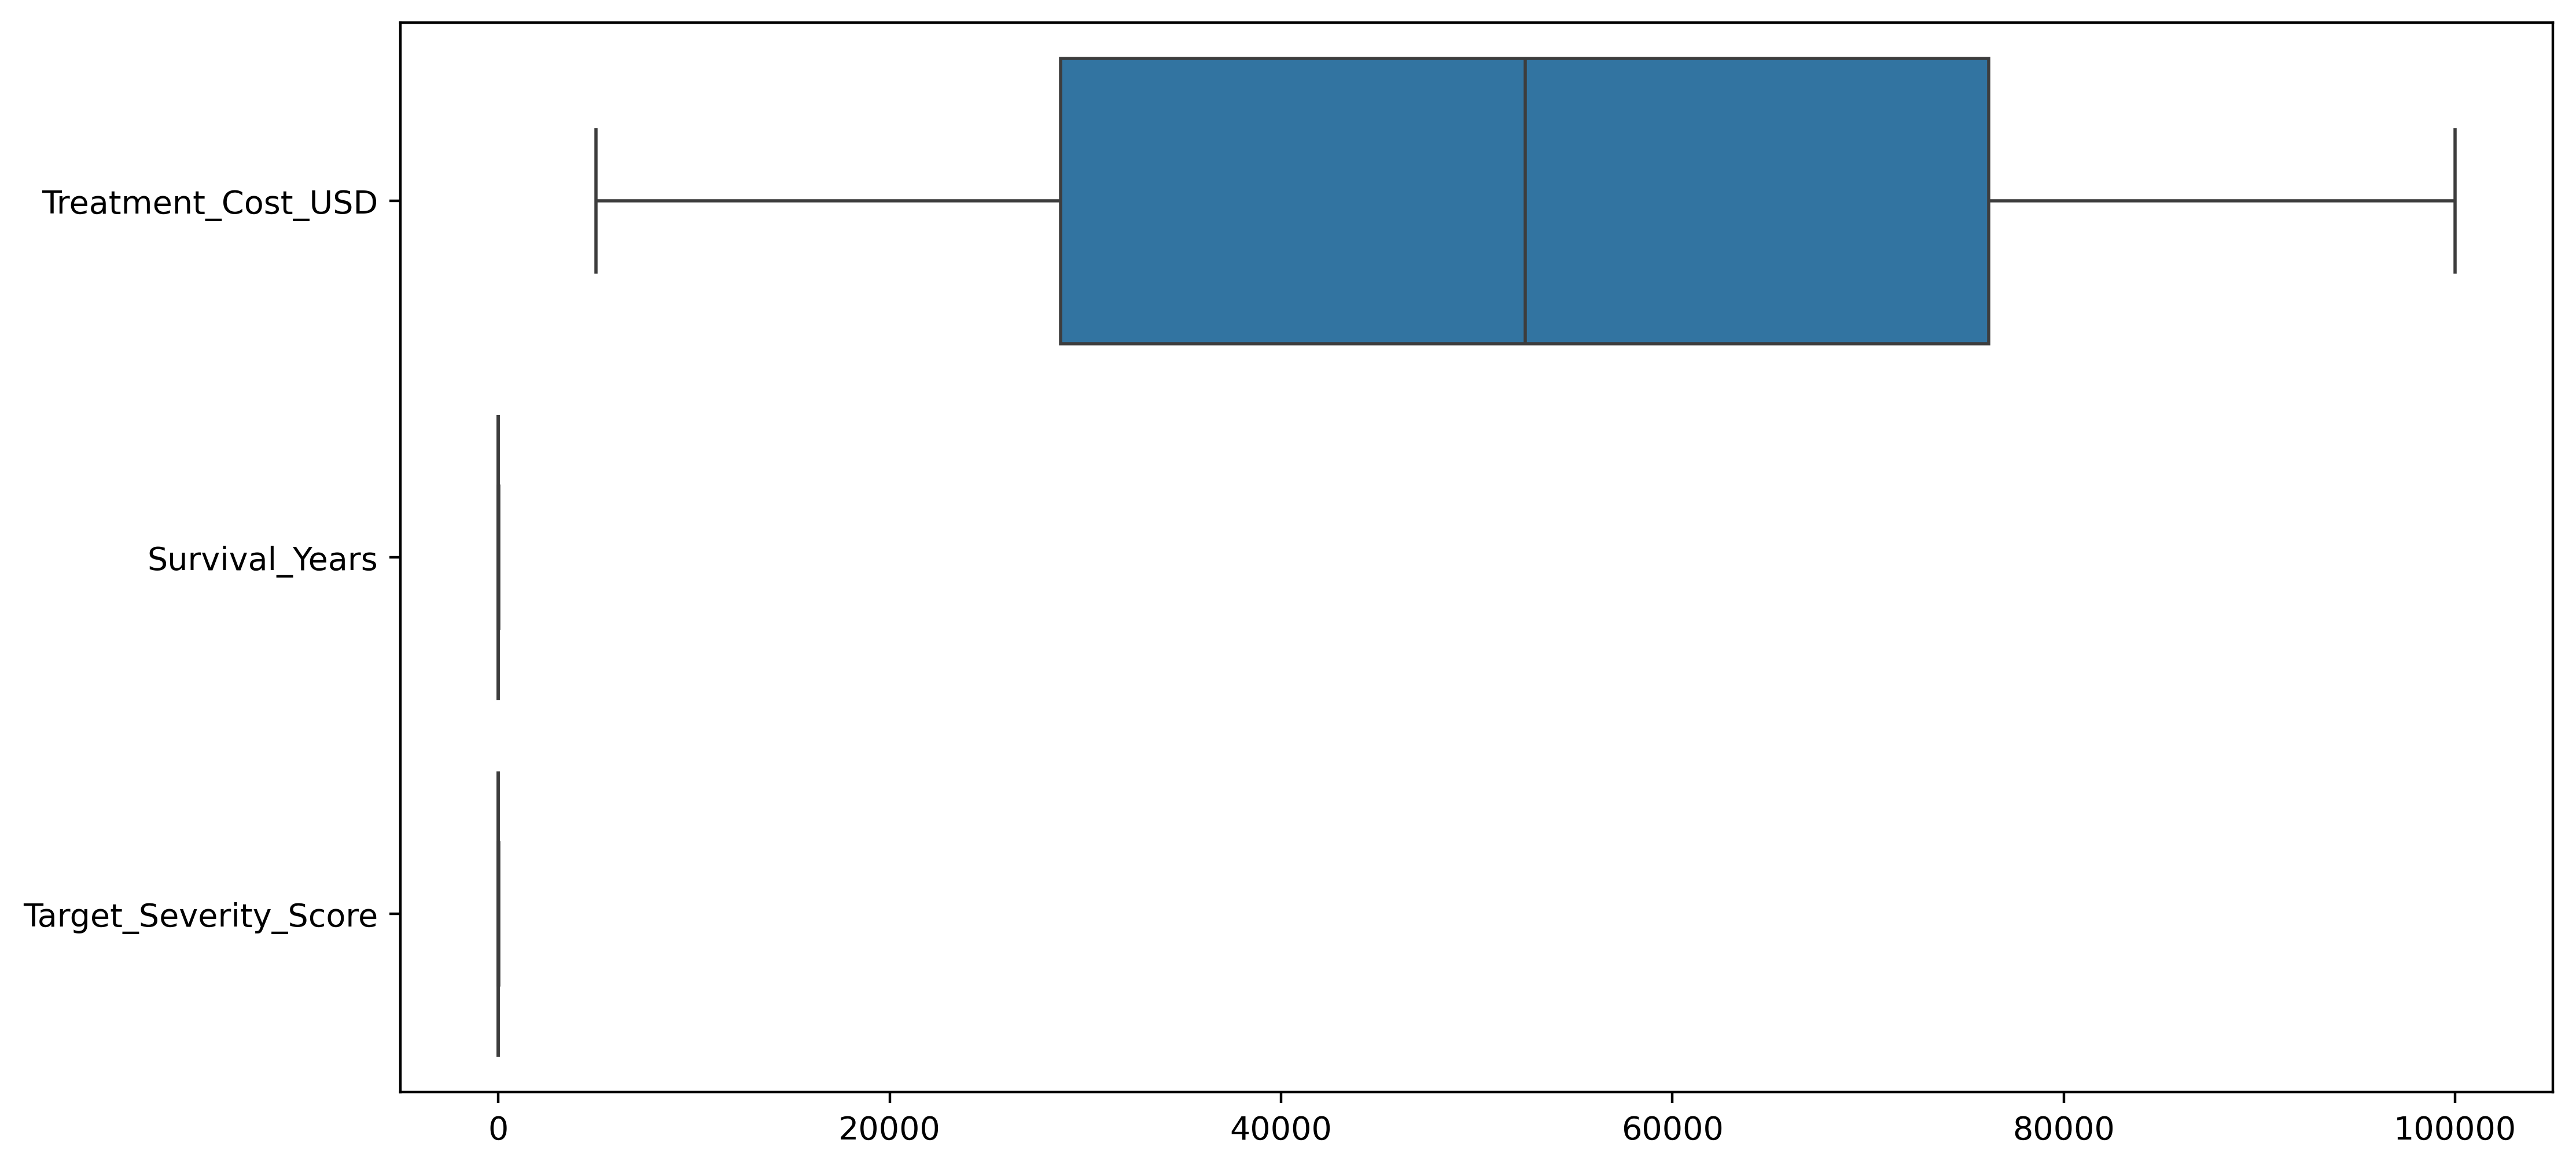

In [231]:
plt.figure(figsize=(12,6),dpi=400)
sns.boxplot(df[['Treatment_Cost_USD','Survival_Years','Target_Severity_Score']],orient='h')


<h2 style="text-align:center; color:purple;">TASK 5</h2>
<h3 style="text-align:center; color:teal;">Encoding Categorical Variables</h3>
<hr>

In [232]:
df.select_dtypes(include='object').columns


Index(['Patient_ID', 'Gender', 'Country_Region', 'Cancer_Type',
       'Cancer_Stage'],
      dtype='object')

In [233]:
## Qeury is we can use 
## Cancer_Stage use Integer Encoding
## Gender and Cancer_Type use One-Hot Encoding
stage_map = {
    'Stage I': 1,
    'Stage II': 2,
    'Stage III': 3,
    'Stage IV': 4
}

In [234]:
df['Cancer_Stage'] = df['Cancer_Stage'].map(stage_map)


In [235]:
df['Cancer_Stage'] = df['Cancer_Stage'].fillna(2)

In [236]:
df['Cancer_Stage'] = df['Cancer_Stage'].astype(int)

In [237]:
df['Cancer_Stage']

0        3
1        2
2        2
3        1
4        3
        ..
49995    2
49996    1
49997    2
49998    4
49999    2
Name: Cancer_Stage, Length: 49849, dtype: int32

In [238]:
df.columns = df.columns.str.strip()

In [239]:
#df = pd.get_dummies(df,columns=['Gender'],drop_first=True)

In [240]:
print(df.columns.tolist())

['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score']


In [241]:
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71.0,Male,UK,2021.0,6.4,2.8,9.5,0.9,8.7,Lung,3,62913.44,5.9,4.92
1,PT0000001,34.0,Male,China,2021.0,1.3,4.5,3.7,3.9,6.3,Leukemia,2,12573.41,4.7,4.65
2,PT0000002,80.0,Male,Pakistan,2023.0,7.4,7.9,2.4,4.7,0.1,Breast,2,6984.33,7.1,5.84
3,PT0000003,40.0,Male,UK,2015.0,1.7,2.9,4.8,3.5,2.7,Colon,1,67446.25,1.6,3.12
4,PT0000004,43.0,Female,Brazil,2017.0,5.1,2.8,2.3,6.7,0.5,Skin,3,77977.12,2.9,3.62


In [242]:
df.tail()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
49995,PT0049995,80.0,Male,Pakistan,2023.0,2.3,7.5,2.8,3.8,2.9,Leukemia,2,71463.70,1.0,3.63
49996,PT0049996,40.0,Female,USA,2018.0,6.4,3.5,2.9,9.0,9.8,Colon,1,49619.66,0.4,6.03
49997,PT0049997,74.0,Male,Pakistan,2015.0,6.2,1.6,8.7,4.7,4.0,Breast,2,5338.25,2.7,6.02
49998,PT0049998,21.0,Male,Brazil,2018.0,4.0,6.5,7.6,8.6,8.1,Liver,4,45100.47,7.5,6.54
49999,PT0049999,22.0,Male,Pakistan,2023.0,5.1,9.8,3.2,0.0,0.7,Liver,2,64023.82,7.4,3.76


<h2 style="text-align:center; color:purple;">TASK 6</h2>
<h3 style="text-align:center; color:teal;">FEATURE SCALING</h3>
<hr>

In [243]:
### Age and risk factors use Standard Scaling

from sklearn.preprocessing import StandardScaler


In [244]:
standard_cols = ['Age', 'Genetic_Risk']

In [245]:
scaler_std = StandardScaler()
df[standard_cols] = scaler_std.fit_transform(df[standard_cols])

In [246]:
print(df[standard_cols].mean())  


Age            -1.146014e-16
Genetic_Risk    3.030379e-16
dtype: float64


In [247]:
print(df[standard_cols].std())

Age             1.00001
Genetic_Risk    1.00001
dtype: float64


In [248]:
# Columns to min-max scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [249]:
minmax_cols = ['Treatment_Cost_USD']

In [250]:
scaler_minmax = MinMaxScaler()
df[minmax_cols] = scaler_minmax.fit_transform(df[minmax_cols])

In [251]:
print(df[minmax_cols].min())

Treatment_Cost_USD    0.0
dtype: float64


In [252]:
print(df[minmax_cols].max())

Treatment_Cost_USD    1.0
dtype: float64


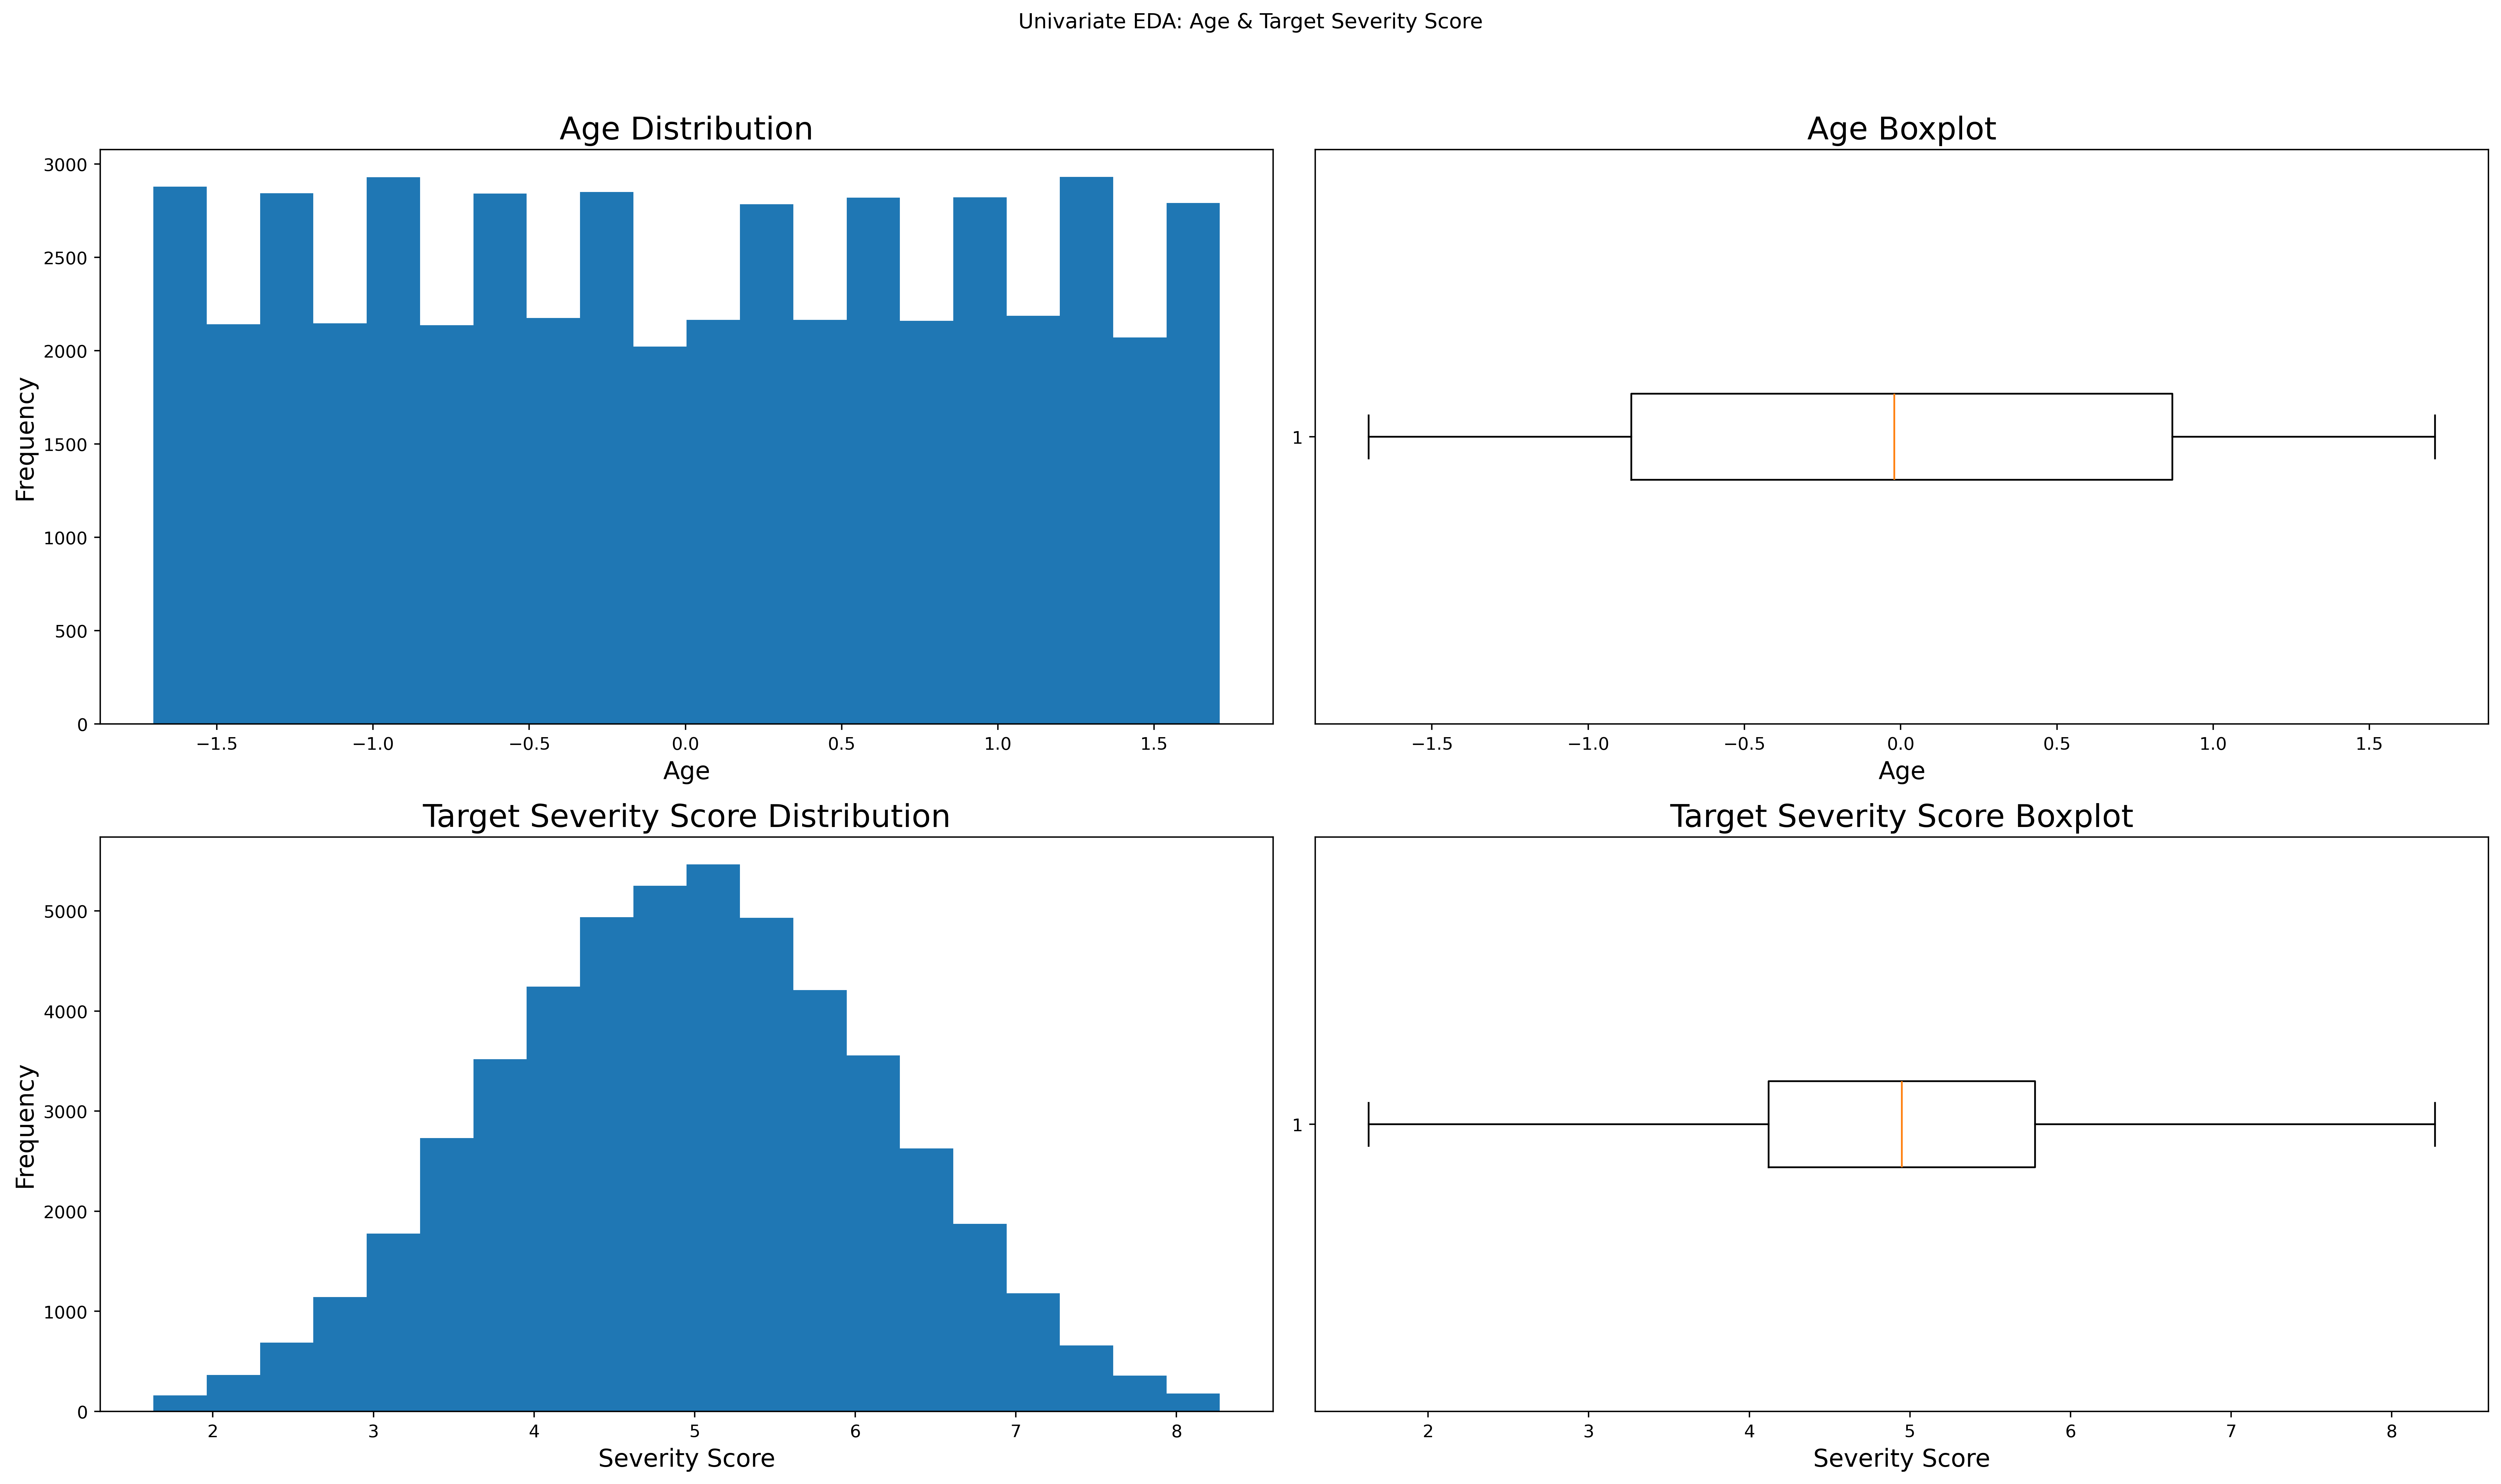

In [253]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12), dpi=400)
fig.suptitle("Univariate EDA: Age & Target Severity Score")
# Age Histogram 
axes[0, 0].hist(df['Age'], bins=20)
axes[0, 0].set_title("Age Distribution", size=18)
axes[0, 0].set_xlabel("Age", size=14)
axes[0, 0].set_ylabel("Frequency", size=14)
# Age Boxplot
axes[0, 1].boxplot(df['Age'], vert=False)
axes[0, 1].set_title("Age Boxplot", size=18)
axes[0, 1].set_xlabel("Age", size=14)

# Target Severity Histogram
axes[1, 0].hist(df['Target_Severity_Score'], bins=20)
axes[1, 0].set_title("Target Severity Score Distribution", size=18)
axes[1, 0].set_xlabel("Severity Score", size=14)
axes[1, 0].set_ylabel("Frequency", size=14)
# Target Severity Boxplot
axes[1, 1].boxplot(df['Target_Severity_Score'], vert=False)
axes[1, 1].set_title("Target Severity Score Boxplot", size=18)
axes[1, 1].set_xlabel("Severity Score", size=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [254]:
cancer_counts = df['Cancer_Type'].value_counts()


In [255]:
cancer_counts

Cancer_Type
Colon       6362
Prostate    6292
Leukemia    6247
Liver       6224
Skin        6206
Cervical    6199
Breast      6178
Lung        6141
Name: count, dtype: int64

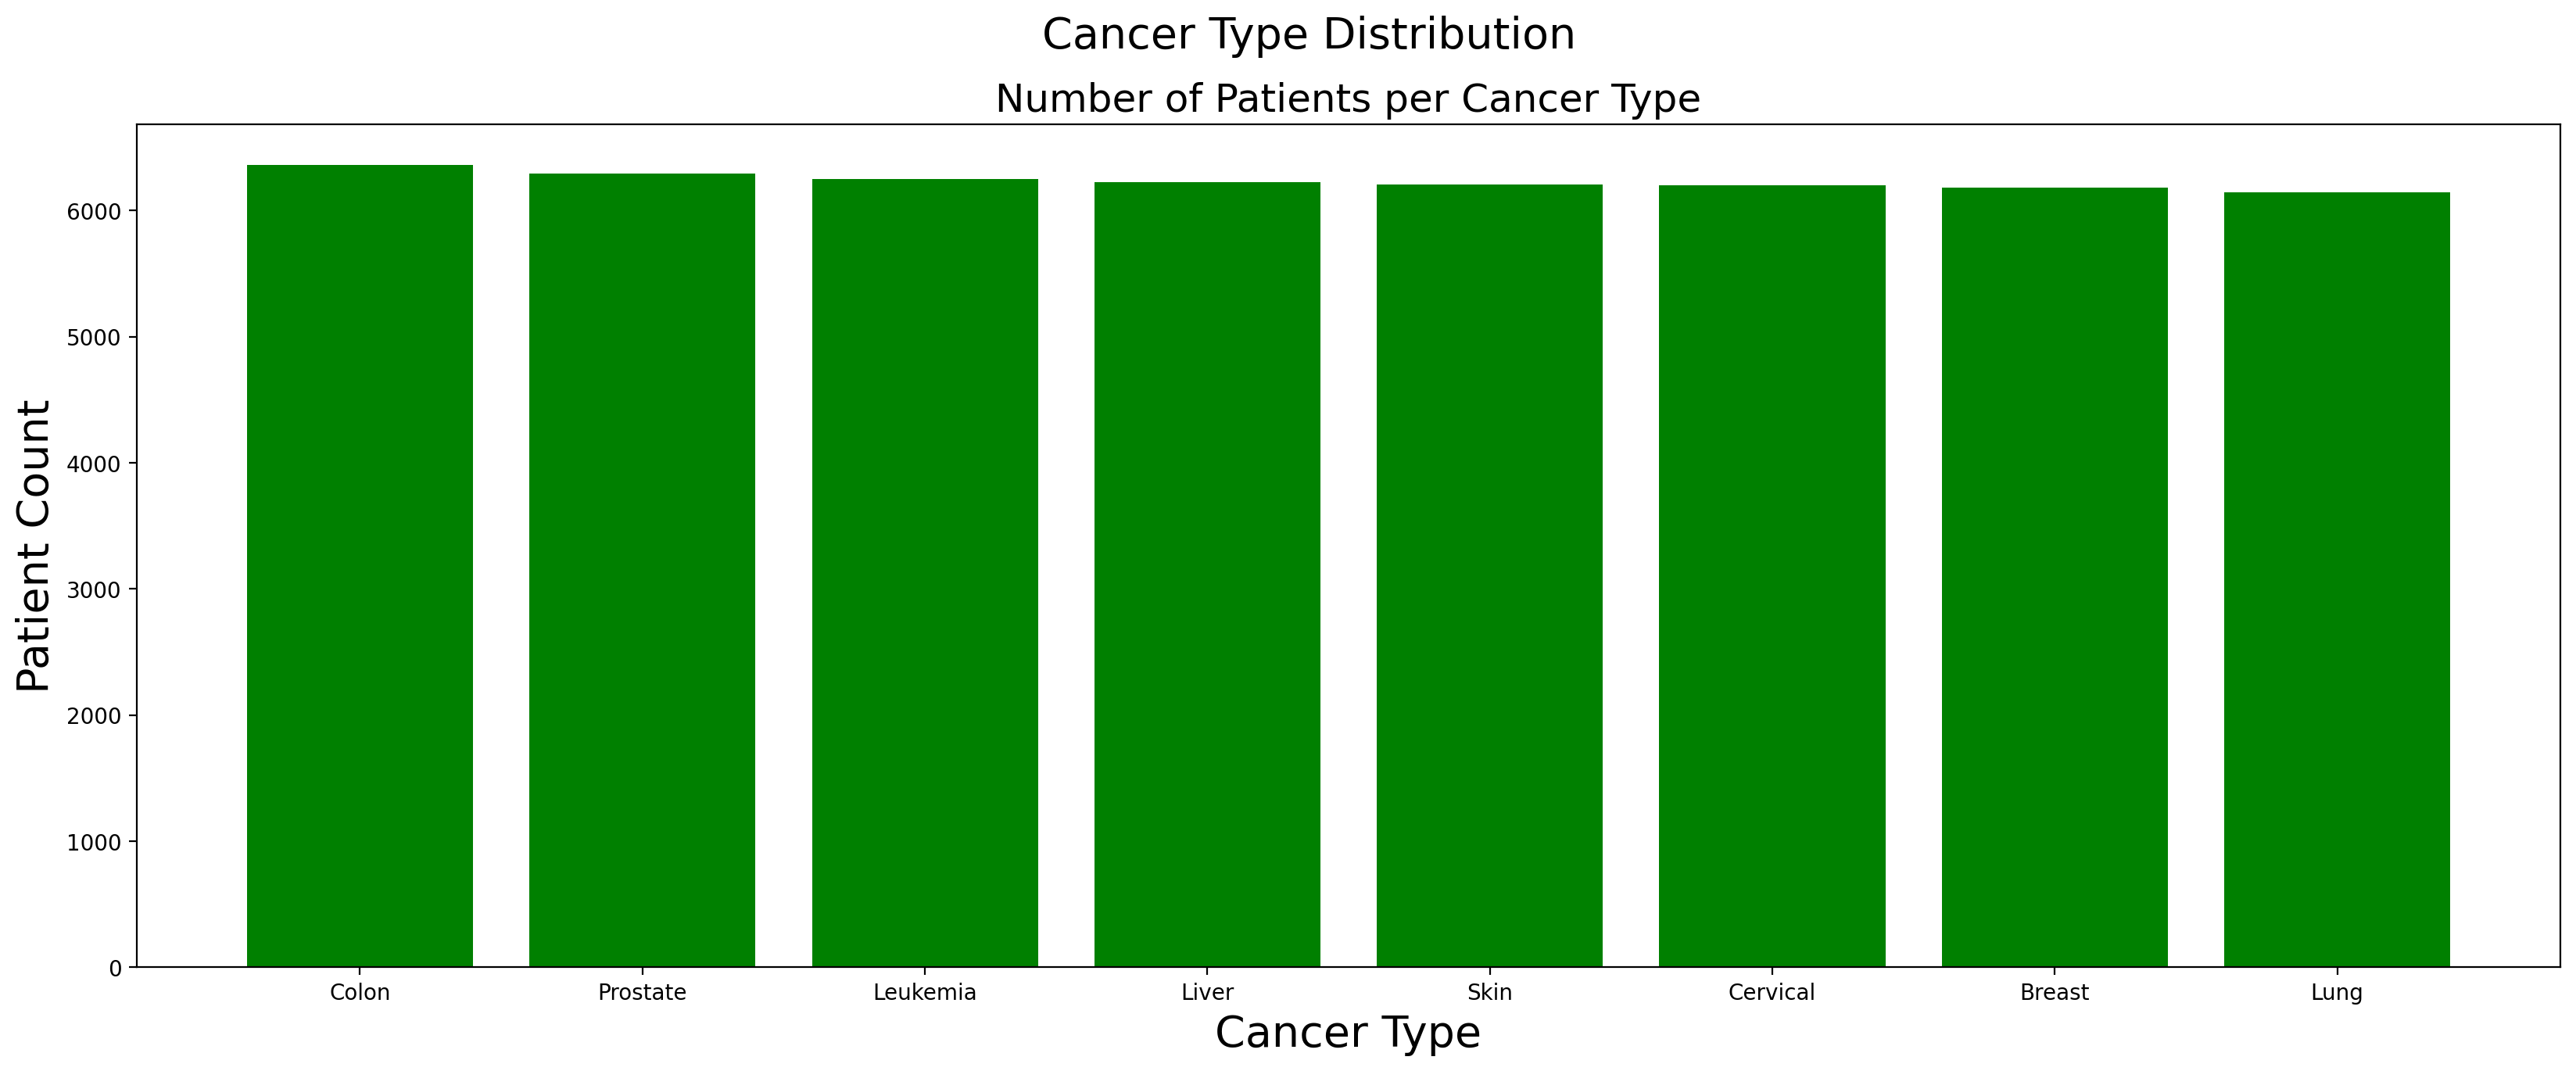

In [261]:
fig, axes = plt.subplots(1, 1, figsize=(20, 7), dpi=200)
fig.suptitle("Cancer Type Distribution", size=20)
axes.bar(cancer_counts.index, cancer_counts.values,color = 'green')
axes.set_title("Number of Patients per Cancer Type", size=18)
axes.set_xlabel("Cancer Type", size=20)
axes.set_ylabel("Patient Count", size=20)
plt.show()



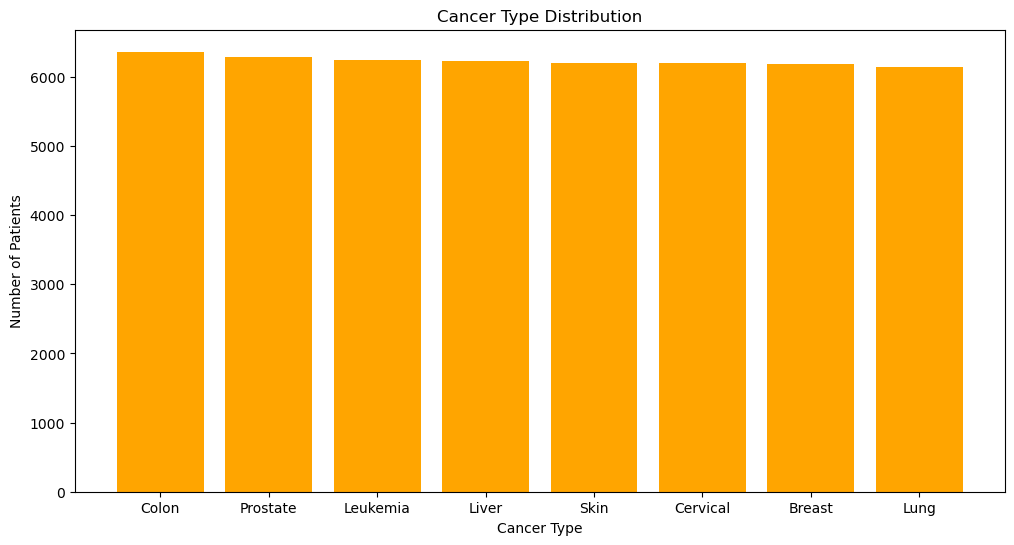

In [257]:
plt.figure(figsize=(12,6), dpi=100)
plt.bar(cancer_counts.index, cancer_counts.values,color="orange")
plt.title('Cancer Type Distribution')
plt.xlabel('Cancer Type')
plt.ylabel('Number of Patients')
plt.show()


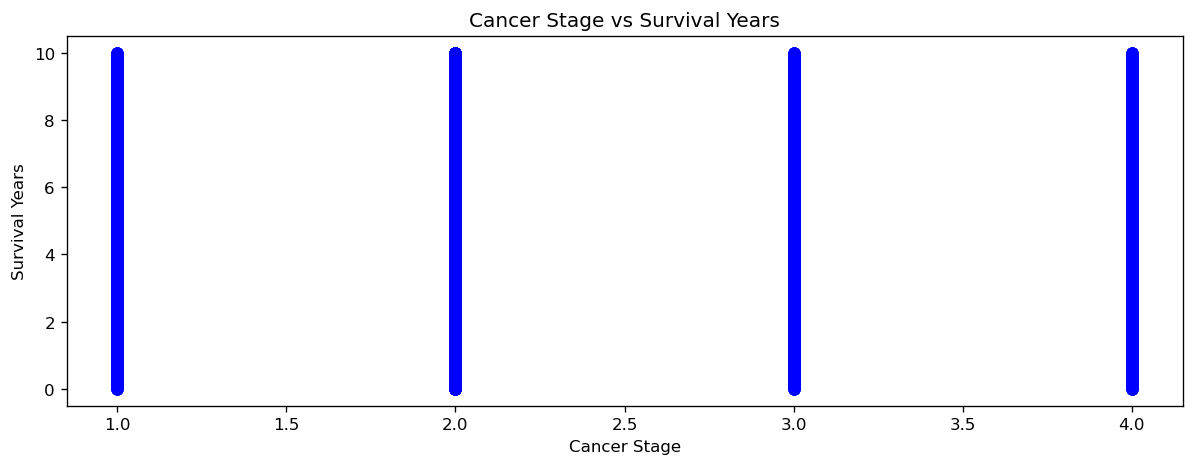

In [154]:
plt.figure(figsize=(12,4), dpi=120)
plt.scatter(df['Cancer_Stage'], df['Survival_Years'],color='blue')
plt.title('Cancer Stage vs Survival Years')
plt.xlabel('Cancer Stage')
plt.ylabel('Survival Years')
plt.show()

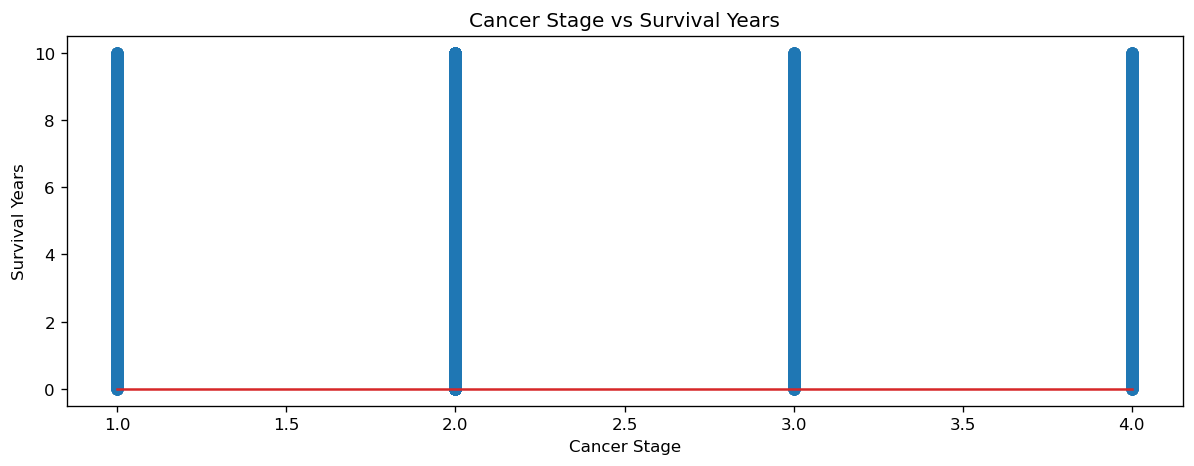

In [265]:
plt.figure(figsize=(12,4), dpi=120)
plt.stem(df['Cancer_Stage'], df['Survival_Years'])
plt.title('Cancer Stage vs Survival Years')
plt.xlabel('Cancer Stage')
plt.ylabel('Survival Years')
plt.show()

C:\Users\sekhar\AppData\Local\Temp\ipykernel_15924\1135227792.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


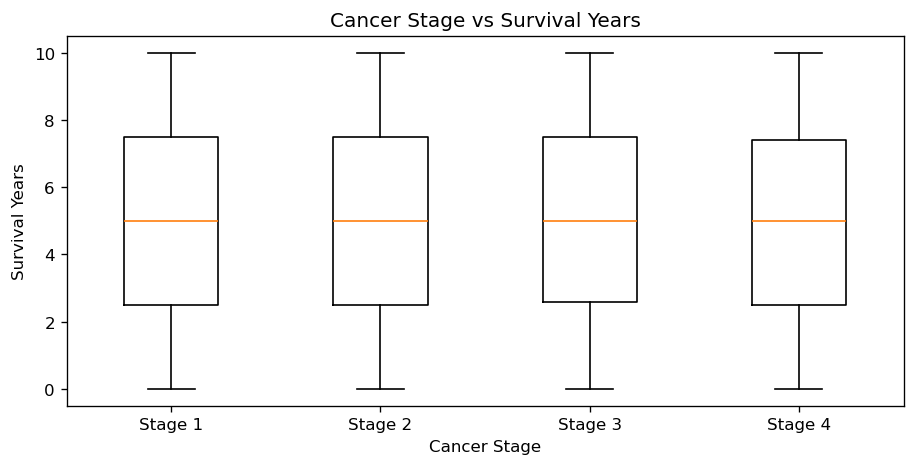

In [155]:
plt.figure(figsize=(9,4), dpi=120)
plt.boxplot(
    [df[df['Cancer_Stage'] == 1]['Survival_Years'],
     df[df['Cancer_Stage'] == 2]['Survival_Years'],
     df[df['Cancer_Stage'] == 3]['Survival_Years'],
     df[df['Cancer_Stage'] == 4]['Survival_Years']],
    labels=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4']
)
plt.title('Cancer Stage vs Survival Years')
plt.xlabel('Cancer Stage')
plt.ylabel('Survival Years')
plt.show()

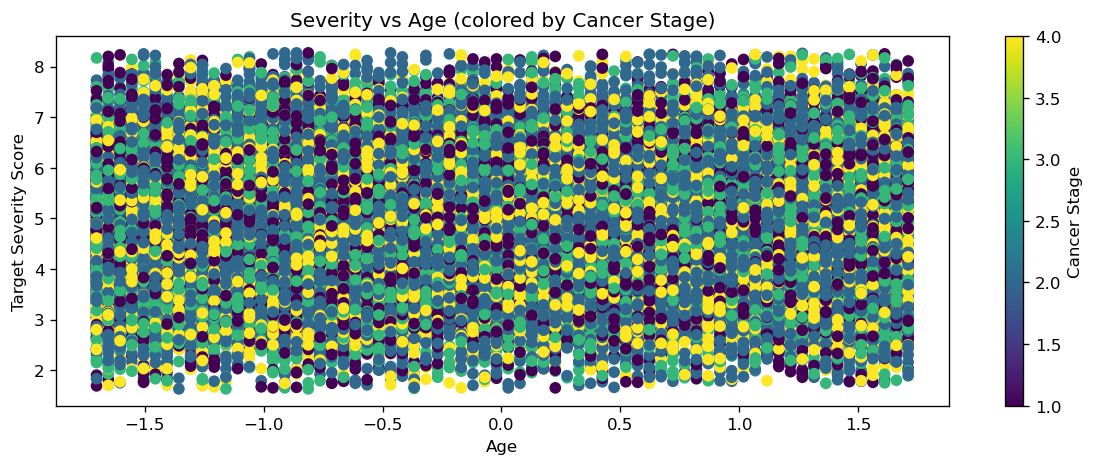

In [156]:
plt.figure(figsize=(12,4), dpi=120)
plt.scatter(df['Age'], df['Target_Severity_Score'], c=df['Cancer_Stage'])
plt.colorbar(label='Cancer Stage')
plt.title('Severity vs Age (colored by Cancer Stage)')
plt.xlabel('Age')
plt.ylabel('Target Severity Score')
plt.show()

### Insights & Conclusion 

 <font color='red'>What are the top 8 insights from the data? Which columns influence severity and survival? </font>


1️⃣ Cancer Stage vs Survival
<font color='purple'>Higher cancer stages are associated with significantly lower survival years.</font>

2️⃣ Stage and Severity Relationship
<font color='blue'>Target_Severity_Score increases consistently from early to advanced cancer stages.</font>

3️⃣ Severity and Treatment Cost
<font color='red'>Patients with higher severity scores incur higher treatment costs.</font>

4️⃣ Genetic Risk Impact
<font color='yellow'>Genetic_Risk shows a strong positive influence on cancer severity.</font>

5️⃣ Age and Severity
<font color='black'>Older patients tend to exhibit moderately higher severity scores.</font>

6️⃣ Severity vs Survival Trend
<font color='orange'>Survival years decrease as cancer severity increases.</font>

7️⃣ Common Cancer Types
<font color='green'>Certain cancer types are more prevalent across the global dataset.</font>

8️⃣ Cost Variability Across Stages
<font color='red'>Treatment costs vary widely even within the same cancer stage.</font>

# Conclusion 

<p style="color:green;">
This project focused on cleaning and analyzing a healthcare cancer dataset using data
preprocessing and EDA techniques. Missing values were handled, duplicates were checked,
and key patterns were identified through visual analysis. The final dataset is clean,
well-structured, and ready for machine learning and predictive modeling tasks.
</p>
